Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [1]:
NAME = "Paulo Santiago"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Data download from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
data=load_iris().data
target=load_iris().target

## Question 3

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# concat iris data and target data
# rename columns from iris feature_names
df = pd.DataFrame(data= np.c_[data, target],columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Question 4

In [6]:
df_head = df.head(5)
df_head

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris.target_names
# setosa = 0
# versicolor = 1
# virginica = 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

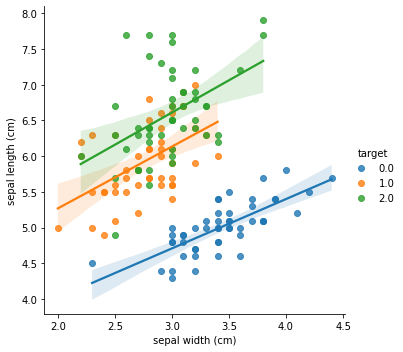

In [8]:
sepal_scatter = sns.lmplot(x="sepal width (cm)", y="sepal length (cm)", hue="target", data=df)

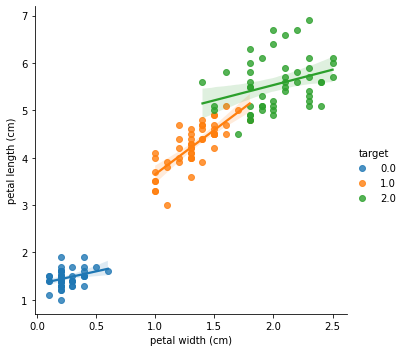

In [9]:
petal_scatter = sns.lmplot(x="petal width (cm)", y="petal length (cm)", hue="target", data=df)

## Question 5

In [10]:
sepal_length = df["sepal length (cm)"].to_numpy()
sepal_width = df["sepal width (cm)"].to_numpy()
petal_length = df["petal length (cm)"].to_numpy()
sepal_width = df["petal length (cm)"].to_numpy()
#target
#data
X = data
y = target

## Question 6

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [12]:
#X_train
#X_test
#y_train
#y_test

## Question 7

In [13]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

## Question 8

In [14]:
prediction = neigh.predict(X_test)
prediction

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [15]:
accuracy_score(prediction, y_test)

0.9736842105263158

In [16]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [17]:
correct = 0
incorrect = 0

for i in range(len(y_test)):
    if (y_test[i] == prediction[i]):
        correct += 1
    else:
        incorrect += 1
        
print("Correct Values: ", correct)
print("Incorrect Values: ", incorrect)
print("Accuracy Score: ", correct / (correct + incorrect))

Correct Values:  37
Incorrect Values:  1
Accuracy Score:  0.9736842105263158


## Question 9

### k = 1

In [18]:
k_1 = KNeighborsClassifier(n_neighbors = 1)
k_1.fit(X_train, y_train)
prediction_1 = k_1.predict(X_test)
print("Prediction array at k = 1: ", prediction_1)
accuracy_1 = accuracy_score(prediction_1, y_test)
print("Accuracy score at k = 1: ", accuracy_1)

Prediction array at k = 1:  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 1:  0.9736842105263158


### k = 3

In [19]:
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train, y_train)
prediction_3 = k_3.predict(X_test)
print("Prediction array at k = 3: ", prediction_3)
accuracy_3 = accuracy_score(prediction_3, y_test)
print("Accuracy score at k = 3: ", accuracy_3)

Prediction array at k = 3:  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 3:  0.9736842105263158


### k = 5

In [20]:
k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train, y_train)
prediction_5 = k_5.predict(X_test)
print("Prediction array at k = 5: ", prediction_5)
accuracy_5 = accuracy_score(prediction_5, y_test)
print("Accuracy score at k = 5: ", accuracy_5)

Prediction array at k = 5:  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 5:  0.9736842105263158


### k = 7

In [21]:
k_7 = KNeighborsClassifier(n_neighbors = 7)
k_7.fit(X_train, y_train)
prediction_7 = k_7.predict(X_test)
print("Prediction array at k = 7: ", prediction_7)
accuracy_7 = accuracy_score(prediction_7, y_test)
print("Accuracy score at k = 7: ", accuracy_7)

Prediction array at k = 7:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 7:  1.0


### k = 10

In [22]:
k_10 = KNeighborsClassifier(n_neighbors = 10)
k_10.fit(X_train, y_train)
prediction_10 = k_10.predict(X_test)
print("Prediction array at k = 10: ", prediction_10)
accuracy_10 = accuracy_score(prediction_10, y_test)
print("Accuracy score at k = 10: ", accuracy_10)

Prediction array at k = 10:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 10:  0.9736842105263158


### k = 20

In [23]:
k_20 = KNeighborsClassifier(n_neighbors = 20)
k_20.fit(X_train, y_train)
prediction_20 = k_20.predict(X_test)
print("Prediction array at k = 20: ", prediction_20)
accuracy_20 = accuracy_score(prediction_20, y_test)
print("Accuracy score at k = 20: ", accuracy_20)

Prediction array at k = 20:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 20:  0.9736842105263158


### k = 30

In [24]:
k_30 = KNeighborsClassifier(n_neighbors = 30)
k_30.fit(X_train, y_train)
prediction_30 = k_30.predict(X_test)
print("Prediction array at k = 30: ", prediction_30)
accuracy_30 = accuracy_score(prediction_30, y_test)
print("Accuracy score at k = 30: ", accuracy_30)

Prediction array at k = 30:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 30:  0.9736842105263158


### k = 40

In [25]:
k_40 = KNeighborsClassifier(n_neighbors = 40)
k_40.fit(X_train, y_train)
prediction_40 = k_40.predict(X_test)
print("Prediction array at k = 40: ", prediction_40)
accuracy_40 = accuracy_score(prediction_1, y_test)
print("Accuracy score at k = 40: ", accuracy_40)

Prediction array at k = 40:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 40:  0.9736842105263158


### k = 50

In [26]:
k_50 = KNeighborsClassifier(n_neighbors = 50)
k_50.fit(X_train, y_train)
prediction_50 = k_50.predict(X_test)
print("Prediction array at k = 1: ", prediction_1)
accuracy_50 = accuracy_score(prediction_50, y_test)
print("Accuracy score at k = 50: ", accuracy_50)

Prediction array at k = 1:  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Accuracy score at k = 50:  0.9736842105263158


### Average Accuracy Score

In [27]:
accuracy_list = [accuracy_1, accuracy_3, accuracy_5, accuracy_7, accuracy_10, accuracy_20, accuracy_30, accuracy_40, accuracy_50]
average = sum(accuracy_list)/len(accuracy_list)
print("Average Accuracy Score: ", average)

Average Accuracy Score:  0.9766081871345028


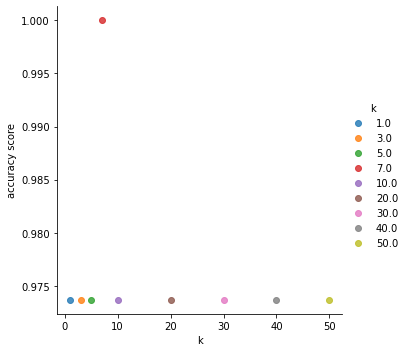

In [28]:
k_list = [1,3,5,7,10,20,30,40,50]

k_accuracy_df = pd.DataFrame(data= np.c_[k_list, accuracy_list], columns=["k", "accuracy score"])
k_accuracy_df

neighbors_scatter = sns.lmplot(x="k", y="accuracy score", hue="k", data=k_accuracy_df)

Analyzing the data and looking at the graph, we can see that the optimal amount of neighbors is when k is equal to 7. Every other values of k, regardless of amount of neighbors is equal to an accuracy score of 0.9736. However, when the number of neighbors is 7, we get a perfect accuracy score of 1. 